# Reviewing essential concepts of numpy

:::{admonition} Learning Objectives  
Be able to:
* appreciate the advantage of using numpy arrays
* create numpy arrays: `np.array()` and intrinsic creation
* use various numpy essentials such as `np.linspace()`, `np.zeros()`, `np.ones()`, `np.geomspace()`, `np.arange()`
* mainuplate numpy data types e.g. `np.astype()`
:::

*You will need the following extensions:*

In [1]:
import numpy as np
import matplotlib.pyplot as pl

Suggested video lessons:

:::{index} numpy arrays
:::

Why use numpy arrays (7 min):  https://www.linkedin.com/learning/numpy-data-science-essential-training/create-arrays-from-python-structures?u=57888345

Array creation (7 min): https://www.linkedin.com/learning/numpy-data-science-essential-training/intrinsic-creation-using-numpy-methods?u=57888345

:::{index} numpy data types
:::

:::{index} np.linspace , np.zeros , np.ones, linspace, ones, zeros
:::

linspace(), zeros(), ones() and numpy data types (9 min): https://www.linkedin.com/learning/numpy-data-science-essential-training/linspace-zeros-ones-data-types?u=57888345

## Calculating and Plotting the anisotropy of the thermal expansion coefficient

Let's take a look at the anisotropy of thermal expansion in a crystal of zinc. We will take the z-axis to be perpendicular to the close-packed planes.  In the x-y plane, the thermal expansion is isotropic but in the x-z or y-z plane zinc is highly anisotropic.  The thermal expansion in a [uvw] direction can be found from:  
$\alpha_{uvw} = \alpha_x\times(n_x^2+n_y^2)+\alpha_z\times n_z^2$  
where $n_x, n_y, n_z$ are the x,y,z components of the unit vector $\frac{[u v w]}{\sqrt{u^2+v^2+w^2}}$ i.e.  
$(n_x, n_y, n_z)=\frac{(u,v,w)}{\sqrt{u^2+v^2+w^2}}$. 



In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Let's look at an example for zinc
For zinc $\alpha_{x}=14\times 10^{-6} \ \ {^\circ C}^{-1}$ and $\alpha_{z}=55\times 10^{-6} \ \ {^\circ} C^{-1}$

First let's write a function to find the unit vector in a direction [u v w]

In [5]:
def unitvec(u,v,w):
    mag=np.sqrt()  # 1(a) finish this line
    return [u,v,w]/mag

In [6]:
# let's test some values for our function unitvec()
print(unitvec(1,0,0))
print(unitvec(1,1,0))
print(unitvec(1,1,1))

[1. 0. 0.]
[0.70710678 0.70710678 0.        ]
[0.57735027 0.57735027 0.57735027]


In [7]:
# What would the values of nx, ny, and nz be for the direction [uvw] = [012]
print(f'unit vector in direction [012] is: {unitvec(0,1,2)}')
print(f'therefore nx is just the first value = {unitvec(0,1,2)[0]}')
print(f'ny the second = {unitvec(0,1,2)[1]}')
print(f'and nz the third = {unitvec(0,1,2)[2]}')

unit vector in direction [012] is: [0.         0.4472136  0.89442719]
therefore nx is just the first value = 0.0
ny the second = 0.4472135954999579
and nz the third = 0.8944271909999159


Substituting into $\alpha_{012}$ (with $\alpha_x = 14$ and $\alpha_z=55$)  
$\alpha_{uvw} = 14\times(n_x^2+n_y^2)+55\times n_z^2$  
gives the thermal expansion in the [012] direction

In [8]:
14*(0**2+0.4472136**2)+55*0.89442719**2  #in units 10^-6 C^-1

46.79999995797073

In [9]:
# write a def to find alpha
def alpha(nx,ny,nz,ax,az):
    α_uvw =    # 1(b) finish this line
    return α_uvw

In [10]:
# let's find alpha in a couple of additional directions
#first let's confirm our answer above [012] that we did above
uvw012=unitvec(0,1,2)
alpha(uvw012[0],uvw012[1],uvw012[2], 14, 55)

46.79999999999999

Let's now consider calculating $\alpha$ in a number of directions

In [14]:
directions=[[0,1,2], [0,0,1], [0,1,0], [0,1,1]]

This is a list of [uvw] directions.  How do we find just the u-values for each direction, i.e. [0,0,0,0] in this case.  We could try `directions[0]` but this give [0,1,2].  We could try `directions[0:3,0]` but this gives an error. We can use a for loop:

In [17]:
uvalues=[]
for uvw in directions:
    uvalues.append(uvw[0])
uvalues

[0, 0, 0, 0]

A simpler way is to use numpy arrays and not python lists.  

In [18]:
directions_array=np.array(directions)
directions_array

array([[0, 1, 2],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1]])

Now the uvalues can be found simply as `directions_array[0:4,0]`. Recall the format is `variable[row_start:row_end+1, column_start:column_end+1]` or if we only want the first value (column) in each direction we just have: `variable[row_start:row_end+1, 0]` without the colon.

In [25]:
uvalues=directions_array[0:4, 0] # remember that the format here is [rows, columns]
uvalues

array([0, 0, 0, 0])

In [22]:
#shorthand if we want all rows and say 2nd column v_values

In [24]:
directions_array[:,1] #2nd column is 1 since we start counting from zero

array([1, 0, 1, 1])

Recall our directions array: 

In [29]:
directions_array

array([[0, 1, 2],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1]])

We can substitute each of these directions into our `unitvec(u,v,w)` function using a for loop: 

:::{index} append
:::

In [34]:
unitvec_array=[]
for x,y,z in directions_array:
    unitvec_array.append(unitvec(x,y,z))
unitvec_array

[array([0.        , 0.4472136 , 0.89442719]),
 array([0., 0., 1.]),
 array([0., 1., 0.]),
 array([0.        , 0.70710678, 0.70710678])]

or in much more compact form using list comprehensions: 

In [93]:
unitvec_array=np.array([unitvec(u,v,w) for u,v,w in directions_array])
unitvec_array

array([[0.        , 0.4472136 , 0.89442719],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.70710678, 0.70710678]])

Now to find the thermal expansion in each direction: 

In [94]:
#corresponding expansion coeff.
alphalist= [alpha(u,v,w, 14, 55) for u,v,w in unitvec_array]
alphalist

[46.79999999999999, 55.0, 14.0, 34.49999999999999]

Now we take each value alpha and multiply the corresponding [uvw] unit direction.  

In [97]:
alpha_vec=np.array([unitvec_array[i]*alphalist[i] for i in np.arange(len(unitvec_array))])
alpha_vec

array([[ 0.        , 20.92959627, 41.85919254],
       [ 0.        ,  0.        , 55.        ],
       [ 0.        , 14.        ,  0.        ],
       [ 0.        , 24.39518395, 24.39518395]])

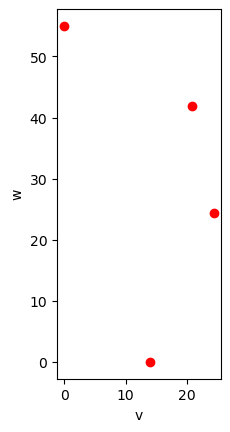

In [98]:
xdata=alpha_vec[:,1]
ydata=alpha_vec[:,2]
# plot direction (v_unit,w_unit)*alphalist
fig, ax = plt.subplots()
ax.plot(xdata, ydata, 'ro')
ax.set_xlabel('v')
ax.set_ylabel('w')
ax.set_aspect(1)
plt.show()

::: {note}  
If you imagine a vector from (0,0) to any point in the figure above. The length of that vector is equal to the thermal expansion coefficient in that direction.  
:::

There are many ways to improve the visual appeal of our plot.  

:::{index} equations in plot labels, LaTeX in plot labels, plt.subplots, plot, set_aspect, set_xlabel, set_title, arrow
:::

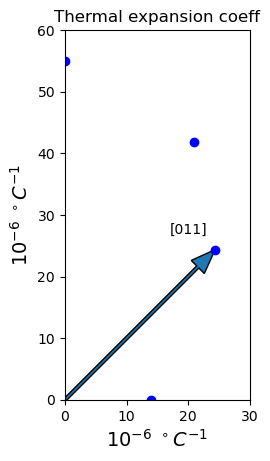

In [92]:
# main plot of xdata, ydata defined previously
fig, ax = plt.subplots()
ax.plot(xdata, ydata, 'bo') # 'bo' means blue point
ax.set_aspect('equal')  # aspect ratio set equal so that scales on x and y are equal

# comment out the line below when you don't know the axes limits
ax.axis([0,30,0,60]) # setting plot axes [xmin, xmax, ymin, ymax]

# add title and label axes
ax.set_title('Thermal expansion coeff')
ax.set_xlabel(r'$10^{-6}\ ^\circ C^{-1}$', fontsize=14) 
ax.set_ylabel(r'$10^{-6}\ ^\circ C^{-1}$', fontsize=14)

# add arrows (xstart, ystart, change in x, change in y)
# arrow(startx,starty,length_in_x, length_in_y)
ax.arrow(0,0,34.5*unitvec(0,1,1)[1], 34.5*unitvec(0,1,1)[2], length_includes_head=True,width=0.5,head_length=4, head_width=3)

# add text xy=[xcoord,ycoord] use plot axis values to place text
ax.annotate('[011]',xy=[17,27])

# put it all together
plt.show()

## Exercises

### Problem 1

In the lesson above, there are two lines of code that need to be completed for this notebook to execute.  They are labeled "1(a) finish this line" and "1(b) finish this line".  Complete the code for these two and write below.  
(a)  
(b)  

### Problem 2

Plot the thermal expansion coefficient for zinc in the v,w plane as shown in the lesson but this time pick 500 random directions of the form [0 v w] where v and w should correspond to both negative and positive values.  You can simply use the random() function as you did last lesson to choose numbers between -1 and 1 for both v and w.  After this, don't forget to then turn these directions into unit directions as shown in the lesson.  Note the symmetry you get about (0,0) in your final plot.  

Hint: Get your notebook working for just a few points before you try to run it with 500 values. 

### Problem 3

Your choice.  Solve a problem from one of your other classes either currently or in the past.  You can extend the problem if it is too simple.  Your answer should include enough commenting to make sure the problem is understood.  Equations should be typed out using the dollar sign math in the markdown cells and you should include some type of plot relevant to the problem. Make sure you label the plot axes and add a title to your plot.  